# Run run_paper_vwc

In [3]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xskillscore as xs
import calendar
import os

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [115]:
site_byl = 'byl'
site_longname_byl = 'Bylot Island, Canadian high Arctic'
y_start_byl = 2013
y_end_byl = 2019

# labels = ['peat_30min_ext', 'peat']
labels = [
    'peat_DEF', 
    'Ref', #no peat
    # 'peat_BUG_CORRECT',
    # 'peat_BUG_CORRECT_TSNBT_OP1',
    # 'peat_BUG_CORRECT_TSNBT_OP1_EZERO',
    # 'peat_PHYS_ALL_SUBLI_CORRECT',
   # 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1',
   # 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne', # Best without TVC (COMPACT_2.5)
   'peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne', # best with TVC
]

root_path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site_byl+'/'
paths = [root_path+'run_'+label for label in labels]

# ds_yr_list = [xr.open_mfdataset(path+'/*_annually.nc').squeeze().load() for path in paths]
# ds_mo_list = [xr.open_mfdataset(path+'/*_monthly.nc').squeeze().load() for path in paths]
ds_d_list_byl = [xr.open_mfdataset(path+'/*_daily.nc').squeeze().load() for path in paths]
# ds_hh_list = [xr.open_mfdataset(path+'/*_halfhourly.nc').squeeze().load() for path in paths]

In [116]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_Ref.nc')

In [117]:
def assign_center_depth(ds, rsfile):
    layer_c = []
    for i in range(len(rsfile.DELZ)):
        if i == 0:
            layer_c.append(rsfile.DELZ.cumsum().values[i]/2)
        else:
            layer_c.append(rsfile.DELZ.cumsum().values[i-1] + rsfile.DELZ.values[i]/2)
    with xr.set_options(keep_attrs=True):
        ds = ds.assign_coords(layer=ds.layer*0+layer_c)
    return ds

In [118]:
for i in range(len(labels)):
    ds_d_list_byl[i] = assign_center_depth(ds_d_list_byl[i], rsfile)

In [119]:
site_umt = 'umt'
site_longname_umt = 'Umiujaq TUNDRA, northeastern Canada'
y_start_umt = 2012
y_end_umt = 2021

labels = [
    'DEF',
    'Ref', #no peat
    # 'BUG_CORRECT',
    # 'BUG_CORRECT_TSNBT_OP1',
    # 'BUG_CORRECT_TSNBT_OP1_EZERO',
    # 'PHYS_ALL_SUBLI_CORRECT',
    # 'PHYS_ALL_SUBLI_v2',
    # 'PHYS_ALL_SUBLI_CORRECT_COMPAC',
    # 'PHYS_ALL_SUBLI_v2_COMPAC_v1',
    # 'PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne', # Best without TVC (COMPACT_2.5)
    'PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne', # best with TVC
]

root_path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site_umt+'/'
paths = [root_path+'run_'+label for label in labels]

# ds_yr_list = [xr.open_mfdataset(path+'/*_annually.nc').squeeze().load() for path in paths]
# ds_mo_list = [xr.open_mfdataset(path+'/*_monthly.nc').squeeze().load() for path in paths]
ds_d_list_umt = [xr.open_mfdataset(path+'/*_daily.nc').squeeze().load() for path in paths]
# ds_hh_list = [xr.open_mfdataset(path+'/*_halfhourly.nc').squeeze().load() for path in paths]

In [120]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site_umt
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_Ref.nc')

In [121]:
for i in range(len(labels)):
    ds_d_list_umt[i] = assign_center_depth(ds_d_list_umt[i], rsfile)

In [122]:
site_tvc = 'tvc'
site_longname_tvc = 'Trail Valley Creak, northwestern Canada'
y_start_tvc = 2013
y_end_tvc = 2019

labels = [
    '1peat_2xSnowf_DEF',
    'Ref_30min_ext', #no peat
    # 'BUG_CORRECT',
    # 'BUG_CORRECT_TSNBT_OP1',
    # '1peat_2xSnowf_BUG_CORRECT_TSNBT_OP1_EZERO',
    # 'PHYS_ALL_SUBLI_CORRECT',
    # '1peat_2xSnowf_PHYS_ALL_SUBLI_v2',
    # 'PHYS_ALL_SUBLI_CORRECT_COMPAC',
    # '1peat_2xSnowf_PHYS_ALL_SUBLI_v2_COMPAC_v1',
    # '1peat_2xSnowf_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne', # Best without TVC (COMPACT_2.5)
    '1peat_2xSnowf_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne', # best with TVC
    
]

root_path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site_tvc+'/'
paths = [root_path+'run_'+label for label in labels]

# ds_yr_list = [xr.open_mfdataset(path+'/*_annually.nc').squeeze().load() for path in paths]
# ds_mo_list = [xr.open_mfdataset(path+'/*_monthly.nc').squeeze().load() for path in paths]
ds_d_list_tvc = [xr.open_mfdataset(path+'/*_daily.nc').squeeze().load() for path in paths]
# ds_hh_list = [xr.open_mfdataset(path+'/*_halfhourly.nc').squeeze().load() for path in paths]

In [123]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site_tvc
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_Ref_30min_ext.nc')

In [124]:
for i in range(len(labels)):
    ds_d_list_tvc[i] = assign_center_depth(ds_d_list_tvc[i], rsfile)

## Convert noleap year cftime to datetime

In [125]:
ds_d_list_tvc[i].time

<xarray.DataArray 'time' (time: 2555)> Size: 20kB
array([cftime.DatetimeNoLeap(2013, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2019, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 20kB 2013-01-01 00:00:00 ... 2019-12-31 00:00:00
Attributes:
    long_name:  time

In [126]:
import cftime
for i in range(len(labels)):
    if isinstance(ds_d_list_tvc[i]['time'].values[0], cftime.DatetimeNoLeap):
        ds_d_list_tvc[i]['time'] = pd.to_datetime(ds_d_list_tvc[i].indexes['time'].to_datetimeindex())

## Compare with obs

In [80]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot'

ds_h_obs = xr.open_dataset(path_obs+'/obs_insitu_'+site_byl+'_'+str(y_start_byl)+'_'+str(y_end_byl)+'.nc').load()
ds_d_obs_byl = ds_h_obs.resample(time='D').mean().load()

ds_d_obs_byl

<xarray.Dataset> Size: 435kB
Dimensions:         (time: 2176, sdepth: 5, sheight: 10)
Coordinates:
  * sdepth          (sdepth) float64 40B 0.02 0.05 0.1 0.15 0.21
  * sheight         (sheight) float64 80B 0.0 0.02 0.05 0.07 ... 0.27 0.35 0.37
  * time            (time) datetime64[ns] 17kB 2013-07-11 ... 2019-06-25
Data variables:
    snd_auto        (time) float64 17kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    albs            (time) float64 17kB 0.1815 0.1357 0.1493 ... 0.1625 0.1964
    flag_albs_ERA5  (time) float64 17kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ts              (time) float64 17kB 11.03 5.161 6.706 ... 5.245 4.045 4.336
    mrsll           (time, sdepth) float64 87kB 0.1981 0.4431 ... 0.08873 0.066
    tsl             (time, sdepth) float64 87kB 6.497 3.928 1.357 ... 0.79 -0.3
    tsnl            (time, sheight) float64 174kB nan nan nan ... nan nan nan
Attributes:
    reference:    Domine, F., Lackner, G., Sarrazin, D., Poirier, M., & Belke...
    description:  Converted to netCDF (SnowMIP kind of format) from original ...

In [23]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'

ds_h_obs = xr.open_dataset(path_obs+'/obs_insitu_'+site_umt+'_'+str(y_start_umt)+'_'+str(y_end_umt)+'.nc').load()

ds_d_obs_umt = ds_h_obs.resample(time='D').mean().load()
ds_d_obs_umt

<xarray.Dataset> Size: 503kB
Dimensions:   (veg: 2, sdepth: 4, time: 3309)
Coordinates:
  * veg       (veg) <U8 64B 'lichen' 'lowshrub'
  * sdepth    (sdepth) float64 32B 0.15 0.25 0.35 0.45
  * time      (time) datetime64[ns] 26kB 2012-09-28 2012-09-29 ... 2021-10-19
Data variables:
    snd_auto  (time) float64 26kB 0.0 0.01196 0.02252 ... 0.03703 0.05901 0.0582
    mrsll     (time, veg, sdepth) float64 212kB nan nan nan nan ... nan nan nan
    tsl       (time, veg, sdepth) float64 212kB nan nan nan nan ... nan nan nan
    albs      (time) float64 26kB 0.08978 0.0732 0.1486 ... 0.1283 0.119 0.1677
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [24]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData'
ds_h_obs = xr.open_dataset(path_obs+'/obs_insitu_tvc_2017_2019.nc')
ds_d_obs_tvc = ds_h_obs.resample(time='D').mean().load()
ds_d_obs_tvc['snd_auto'] = ds_d_obs.snd_auto/100
ds_d_obs_tvc = ds_d_obs_tvc.rename({'albedo': 'albs', 'swc': 'mrsll'})
ds_d_obs_tvc

<xarray.Dataset> Size: 112kB
Dimensions:           (sdepth: 4, time: 668)
Coordinates:
  * sdepth            (sdepth) float64 32B 0.02 0.05 0.1 0.2
  * time              (time) datetime64[ns] 5kB 2017-09-01 ... 2019-06-30
Data variables: (12/14)
    snd_auto          (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tsl               (time, sdepth) float64 21kB 5.021 3.834 ... 5.732 4.72
    mrsll             (time, sdepth) float64 21kB 0.232 0.1819 ... 0.287 0.433
    SoilHEatFlux_org  (time) float64 5kB 6.104 11.39 9.86 1.357 ... nan nan nan
    SoilHEatFlux_min  (time) float64 5kB 5.848 12.86 11.75 7.613 ... nan nan nan
    NEE_filt          (time) float64 5kB -0.8253 0.1094 0.406 ... -2.071 -0.0614
    ...                ...
    NEE_filled        (time) float64 5kB 0.152 0.6982 0.6329 ... -1.871 -0.0614
    LE_filled         (time) float64 5kB 22.29 16.89 21.12 ... 32.07 27.5 -1.015
    H_filled          (time) float64 5kB 17.54 12.97 17.06 ... 78.96 -12.94
    CH4_filt          (time) float64 5kB 0.001279 0.001616 0.002003 ... nan nan
    CH4_filled        (time) float64 5kB 0.001136 0.001072 ... 0.0002559
    albs              (time) float64 5kB 0.1721 0.1551 0.209 ... 0.225 0.331
Attributes:
    location:    Trail Valley Creak
    ref:         https://doi.org/10.5194/tc-16-4201-2022
    soil_ref:    https://doi.pangaea.de/10.1594/PANGAEA.962726
    downloaded:  13/10/2024 by Mickaël Lalande
    merge:       TVCSnowCLM/TVCMetData/MSC_Snowdepth.csv and TVC_CLASSIC_2013...

### Volumetric water content

https://medium.com/@wenzhao.li1989/soil-moisture-convert-mm-kg-m-2-and-m%C2%B3-m-3-e52be1fe98ef

The NCA-LDAS dataset currently provide soil moisture values in units of [m³ m-3] for volumetric soil moisture. To convert to units of [kg m-2] for the total soil moisture amount in each layer, all you do is multiply the [m³ m-3] value by the thickness of the layer in [mm].

<a list of 5 Line2D objects>

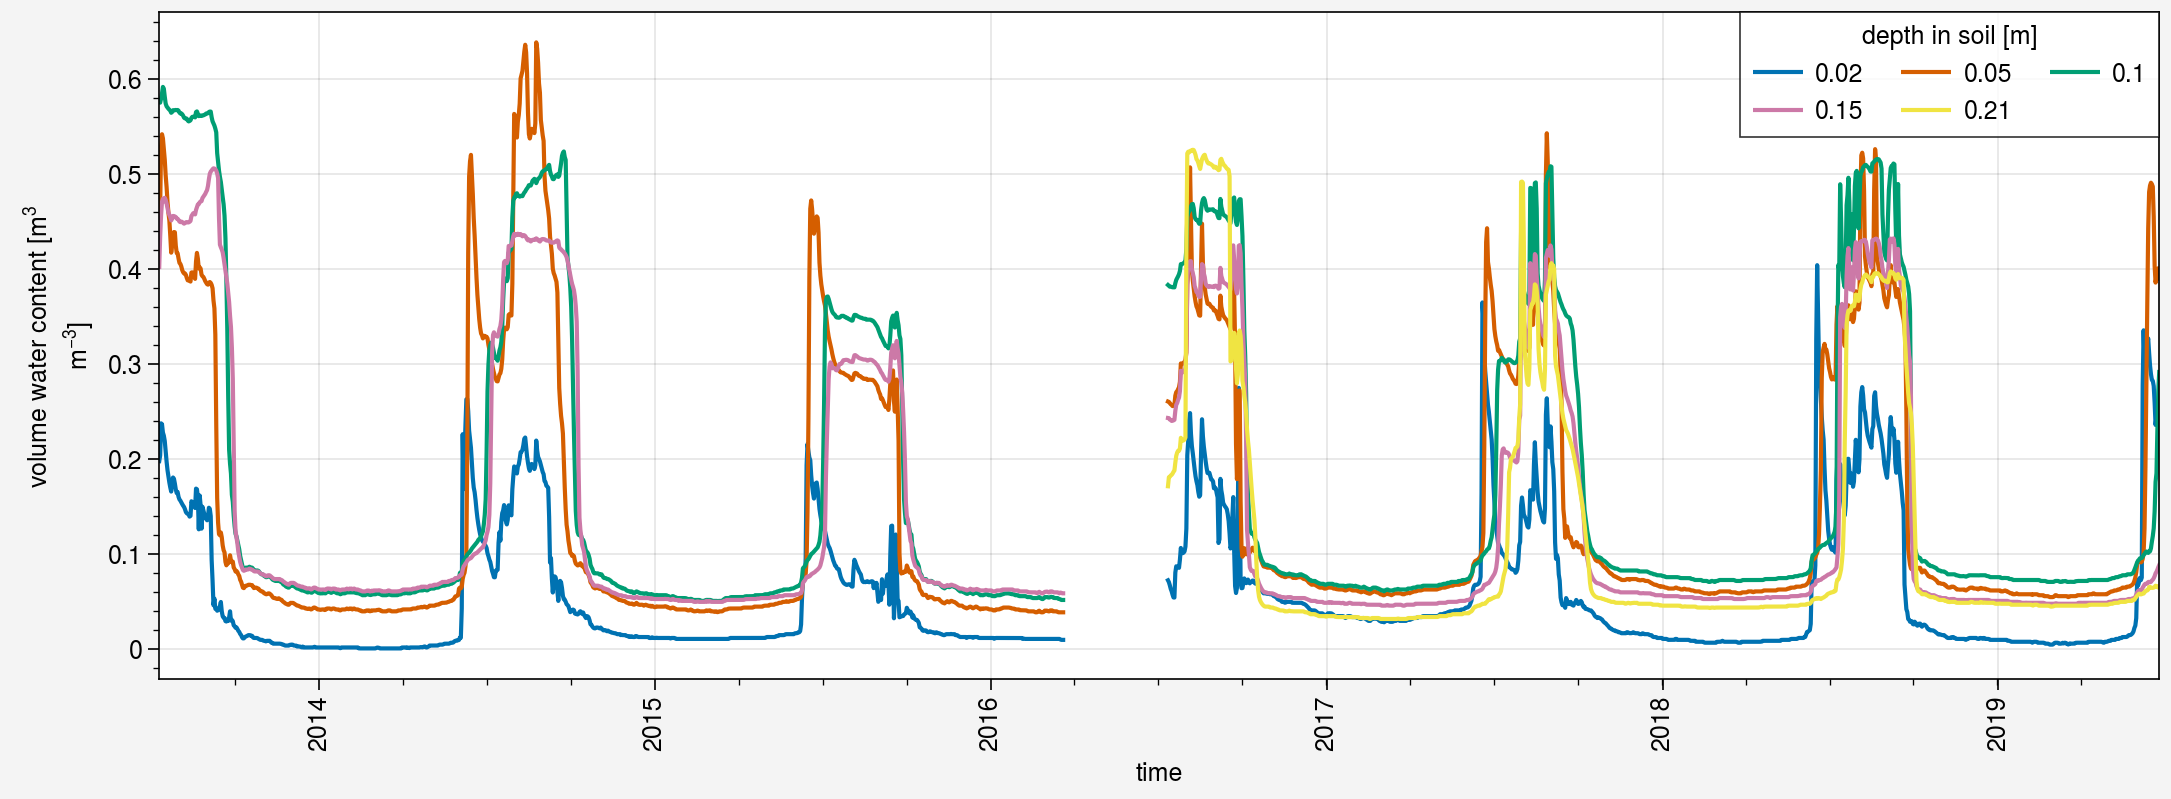

In [25]:
%matplotlib inline
fig, axs = pplt.subplots(refwidth=10, refaspect=3)
ds_d_obs_byl.mrsll.plot(hue='sdepth')

In [26]:
y_start_byl

2013

In [127]:
# label_exps = ['DEF', 'PHYS', '+ SUBLI', '+ COMPAC', '+ CL11', 'ALL_TVC']
label_exps = ['DEF', 'DEF (no peat)', 'ALL_TVC']


In [45]:
ds_d.mrsll

<xarray.DataArray 'mrsll' (time: 2556, layer: 20)> Size: 409kB
array([[4., 4., 4., ..., 0., 0., 0.],
       [4., 4., 4., ..., 0., 0., 0.],
       [4., 4., 4., ..., 0., 0., 0.],
       ...,
       [4., 4., 4., ..., 0., 0., 0.],
       [4., 4., 4., ..., 0., 0., 0.],
       [4., 4., 4., ..., 0., 0., 0.]])
Coordinates:
  * time     (time) datetime64[ns] 20kB 2013-01-01 2013-01-02 ... 2019-12-31
  * layer    (layer) float64 160B 0.05 0.15 0.25 0.35 ... 8.9 18.9 41.4 58.9
Attributes:
    long_name:   In each soil layer, the mass of water in liquid phase. Repor...
    units:       kg m$^{-2}$
    nameInCode:  thlqacc_d

In [63]:
ds_d_obs_umt.mrsll.sel(time=period, sdepth=sdepth)

<xarray.DataArray 'mrsll' (time: 3229, veg: 2)> Size: 52kB
array([[       nan,        nan],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [0.06792361, 0.08224167],
       [0.06542917, 0.0802625 ],
       [0.06373472, 0.07959167]])
Coordinates:
  * veg      (veg) <U8 64B 'lichen' 'lowshrub'
    sdepth   float64 8B 0.15
  * time     (time) datetime64[ns] 26kB 2012-09-28 2012-09-29 ... 2021-07-31
Attributes:
    name:     vol SWC
    unit:     m**3/m**3

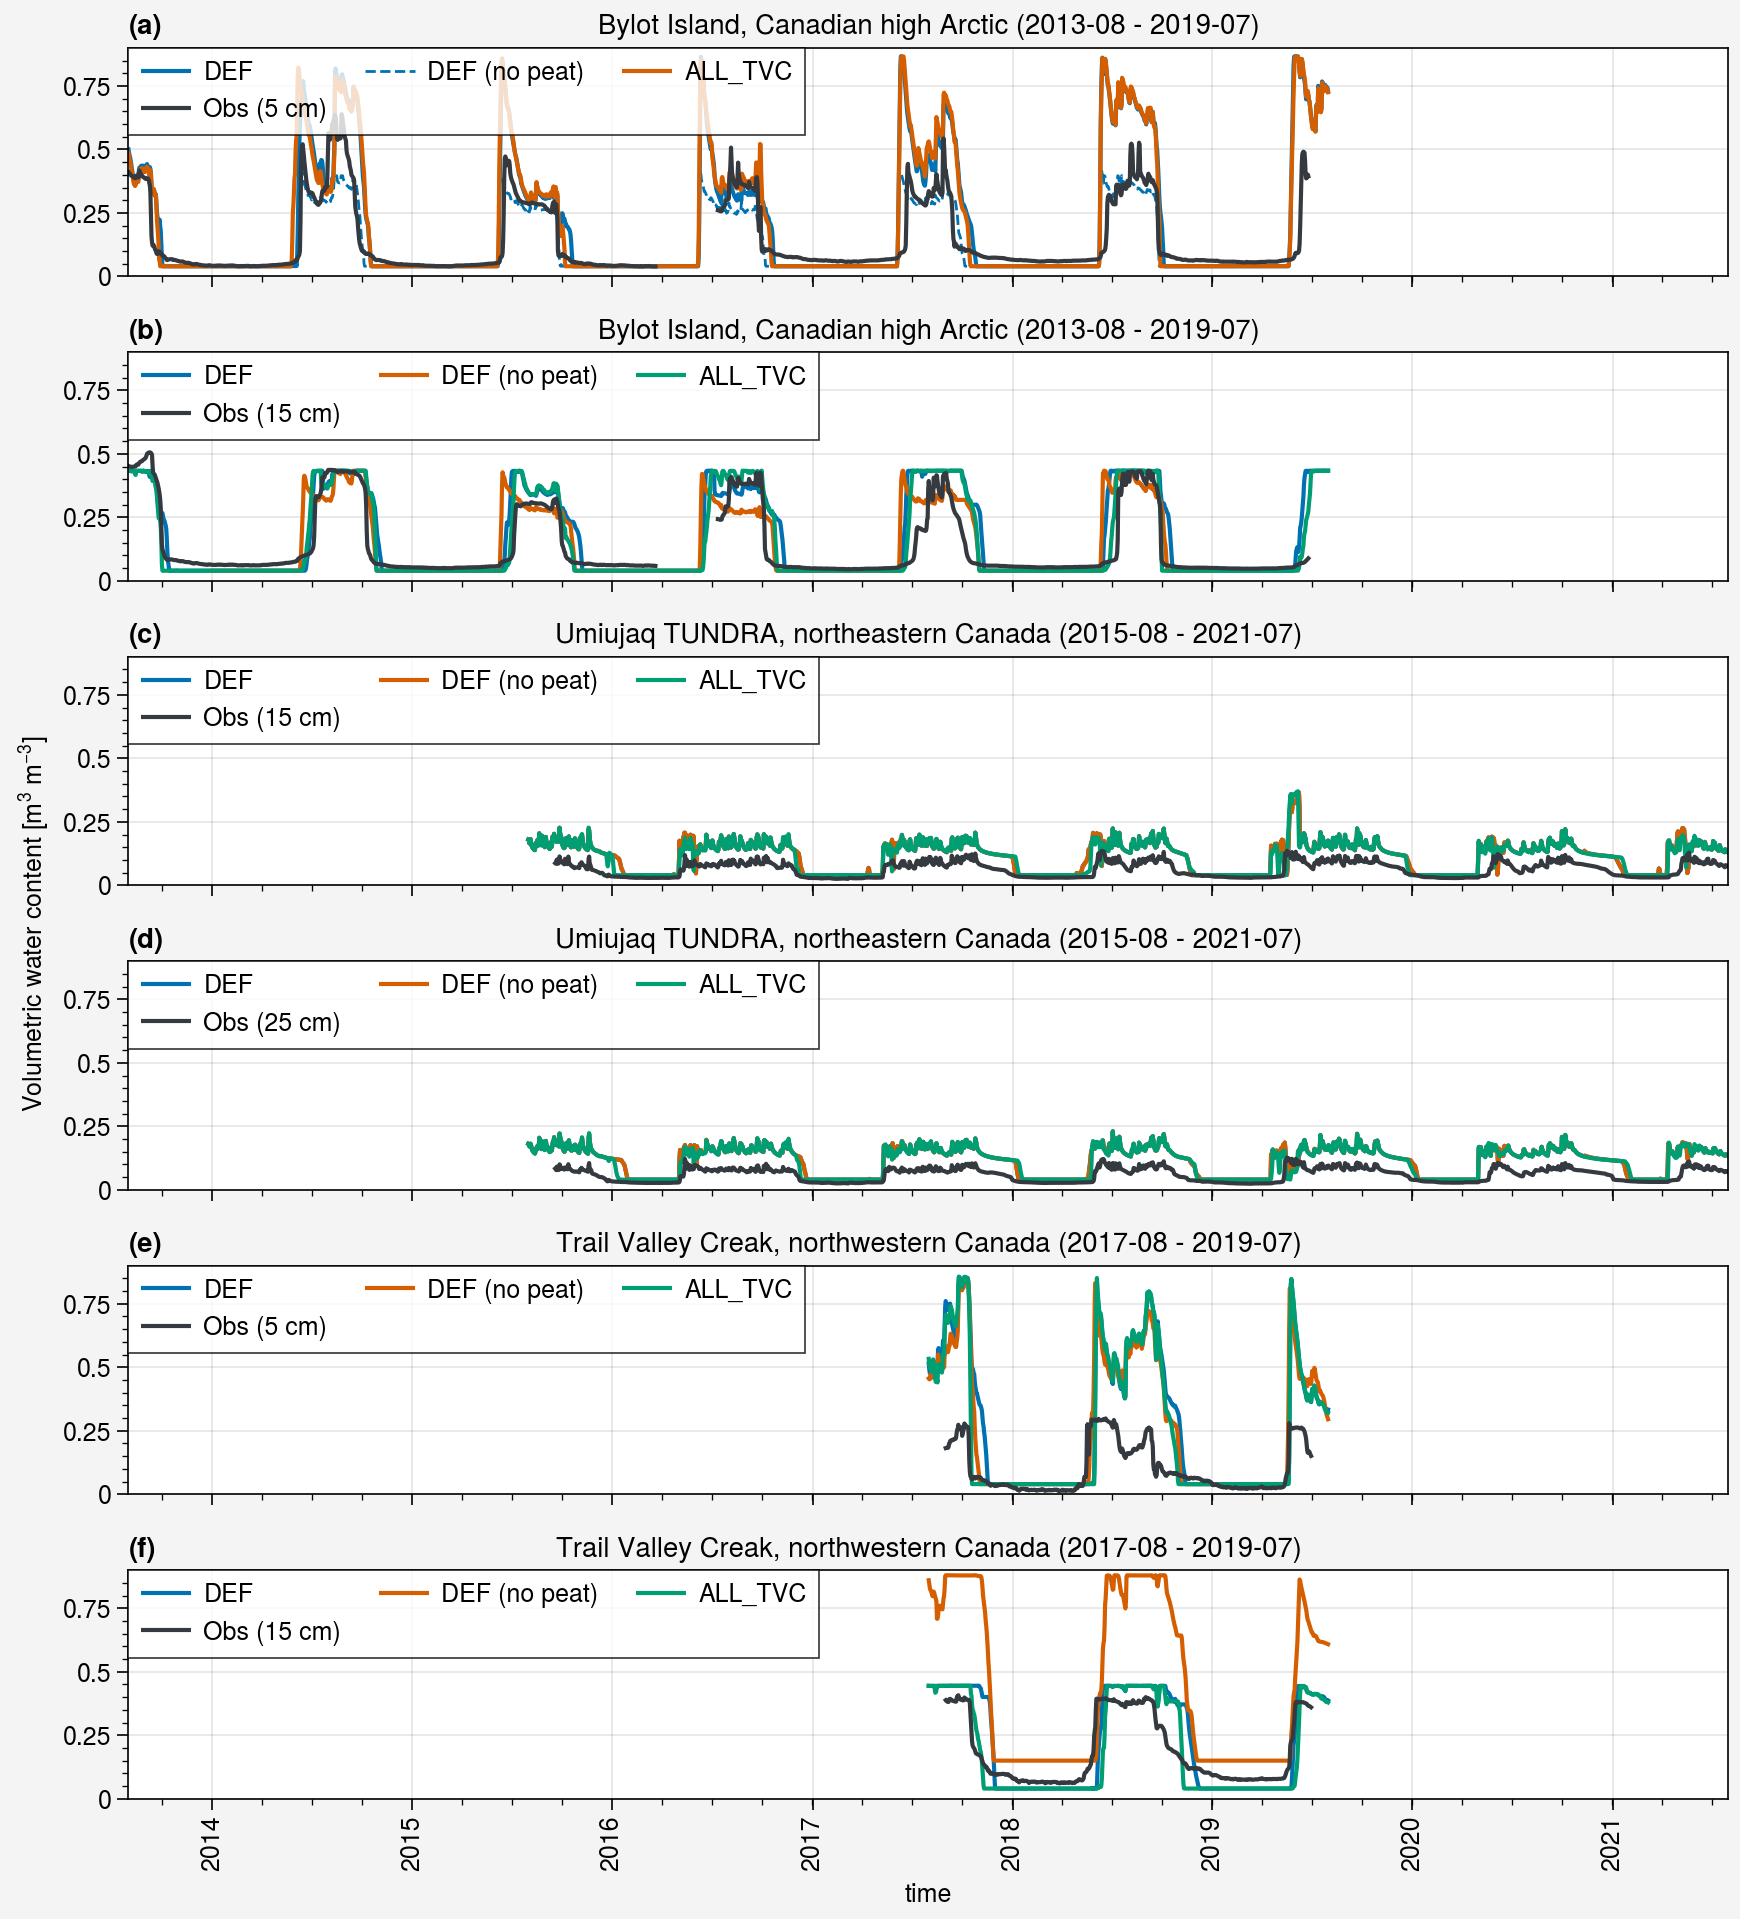

In [130]:
%matplotlib inline
color_obs = 'gray8'

fig, axs = pplt.subplots(ncols=1, nrows=6, refaspect=7, refwidth=8)


###########
### byl ###
###########

period=slice(str(y_start_byl)+'-08',str(y_end_byl)+'-07')

sdepth = 0.05
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_byl, labels, label_exps):
    if label_exp == 'DEF (no peat)':
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth)/100, label=label_exp, c='C0', ls='--', lw=1)
    else:
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth)/100, label=label_exp)
    
# Obs
axs[0].plot(ds_d_obs_byl.mrsll.sel(time=period, sdepth=sdepth), color=color_obs, label='Obs (5 cm)')
# axs[0].plot((ds_d_obs_byl.mrsll.sel(time=period).sel(sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02)), label='Obs (integral 0.02 to 0.1 m)')
axs[0].format(title=site_longname_byl + ' (' + period.start+' - '+period.stop + ')', ylabel='Volumetric water content [m$^3$ m$^{-3}$]')

# fig.legend(loc='b', ncols=8)


sdepth = 0.15
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_byl, labels, label_exps):
    if label_exp == 'DEF (no peat)':
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp, c='C0', ls='--', lw=1)
    else:
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp)
    
# Obs
axs[1].plot(ds_d_obs_byl.mrsll.sel(time=period, sdepth=sdepth), color=color_obs, label='Obs (15 cm)')
# axs[0].plot((ds_d_obs_byl.mrsll.sel(time=period).sel(sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02)), label='Obs (integral 0.02 to 0.1 m)')
axs[1].format(title=site_longname_byl + ' (' + period.start+' - '+period.stop + ')', ylabel='Volumetric water content [m$^3$ m$^{-3}$]')



###########
### umt ###
###########

period=slice('2015-08',str(y_end_umt)+'-07')

sdepth = 0.15
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_umt, labels, label_exps):
    if label_exp == 'DEF (no peat)':
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp, c='C0', ls='--', lw=1)
    else:
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp)
    
# Obs
axs[2].plot(ds_d_obs_umt.mrsll.sel(time=period, sdepth=sdepth).mean('veg'), color=color_obs, label='Obs (15 cm)')
# axs[0].plot((ds_d_obs_byl.mrsll.sel(time=period).sel(sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02)), label='Obs (integral 0.02 to 0.1 m)')
axs[2].format(title=site_longname_umt + ' (' + period.start+' - '+period.stop + ')', ylabel='Volumetric water content [m$^3$ m$^{-3}$]')


sdepth = 0.25
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_umt, labels, label_exps):
    axs[3].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp)
    
# Obs
axs[3].plot(ds_d_obs_umt.mrsll.sel(time=period, sdepth=sdepth).mean('veg'), color=color_obs, label='Obs (25 cm)')
# axs[0].plot((ds_d_obs_byl.mrsll.sel(time=period).sel(sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02)), label='Obs (integral 0.02 to 0.1 m)')
axs[3].format(title=site_longname_umt + ' (' + period.start+' - '+period.stop + ')', ylabel='Volumetric water content [m$^3$ m$^{-3}$]')



###########
### tvc ###
###########

period=slice('2017-08',str(y_end_tvc)+'-07')

sdepth = 0.05
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_tvc, labels, label_exps):
    axs[4].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth)/100, label=label_exp)
    
# Obs
axs[4].plot(ds_d_obs_tvc.mrsll.sel(time=period, sdepth=sdepth), color=color_obs, label='Obs (5 cm)')
# axs[0].plot((ds_d_obs_byl.mrsll.sel(time=period).sel(sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02)), label='Obs (integral 0.02 to 0.1 m)')
axs[4].format(title=site_longname_tvc + ' (' + period.start+' - '+period.stop + ')', ylabel='Volumetric water content [m$^3$ m$^{-3}$]')


sdepth = 0.15
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_tvc, labels, label_exps):
    axs[5].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp)
    
# Obs
axs[5].plot(ds_d_obs_tvc.mrsll.sel(time=period, sdepth=[0.1, 0.2]).mean('sdepth'), color=color_obs, label='Obs (15 cm)')
# axs[0].plot((ds_d_obs_byl.mrsll.sel(time=period).sel(sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02)), label='Obs (integral 0.02 to 0.1 m)')
axs[5].format(title=site_longname_tvc + ' (' + period.start+' - '+period.stop + ')', ylabel='Volumetric water content [m$^3$ m$^{-3}$]')

for ax in axs:
    ax.format(ylim=(0,0.9))
    ax.legend(loc='ul')

fig.format(abc='(a)')
# fig.suptitle(site_longname_byl)


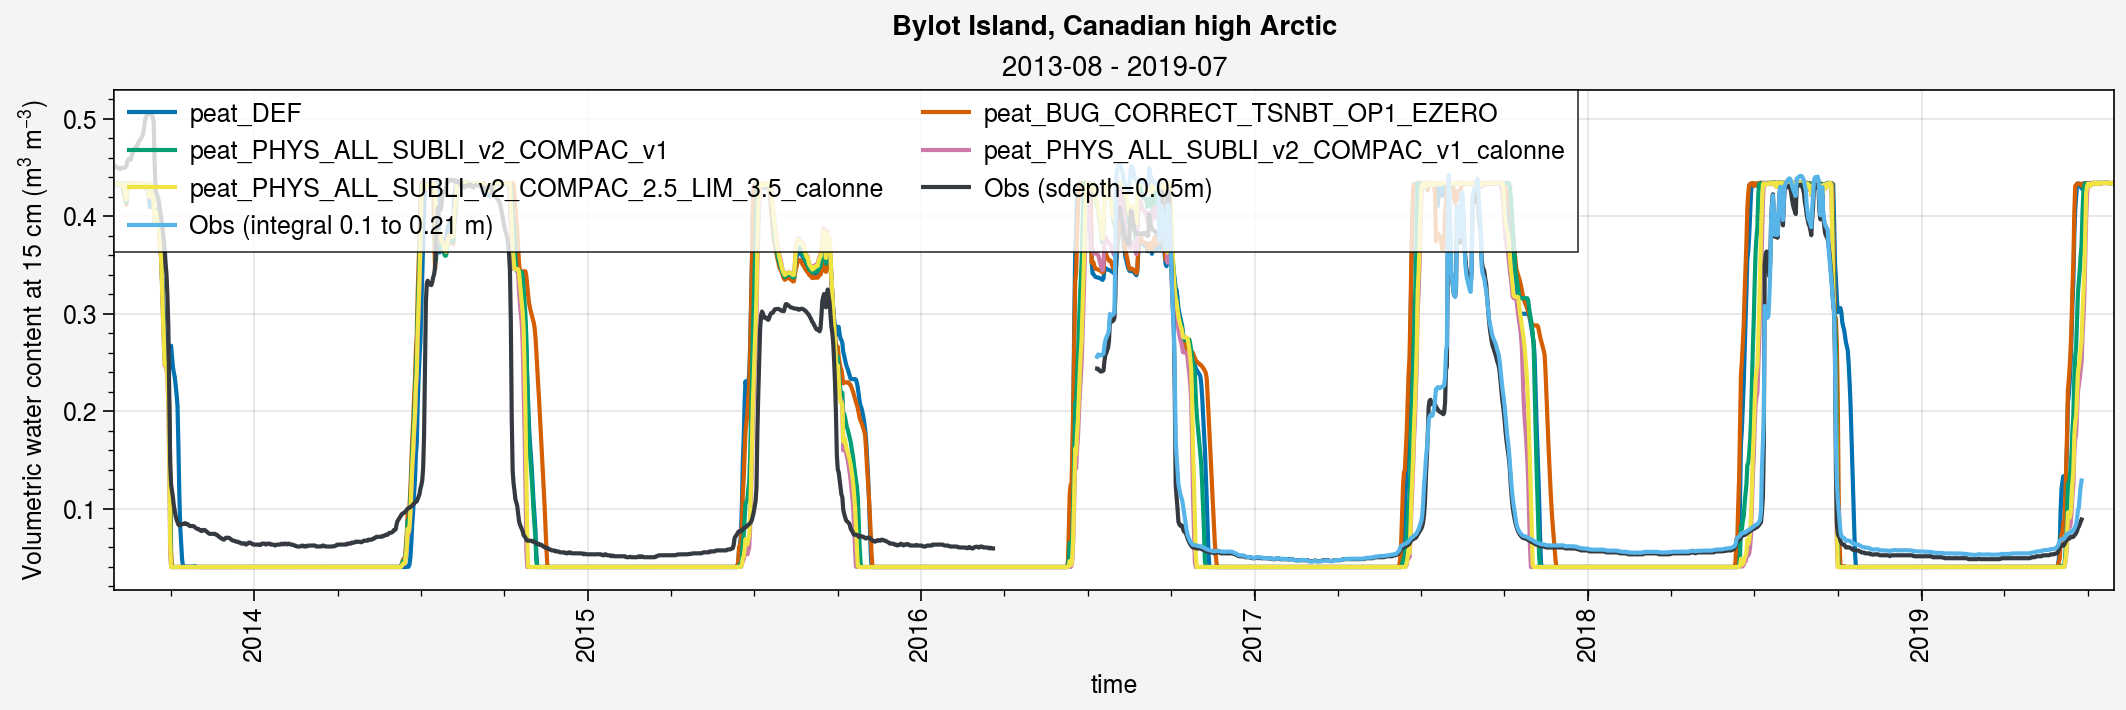

In [58]:
%matplotlib inline
gap = 6
color_obs = 'gray8'
sdepth = 0.15
sdepth_label = str(int(sdepth*100))

for i in range(tot_year//gap):
    fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=10)

    if i*gap+gap < tot_year:
        period=slice(str(years[i*gap])+'-08',str(years[i*gap+gap])+'-07')
    else:
        period=slice(str(years[i*gap])+'-08',str(years[-1])+'-07')
    
    # Simus
    for ds_d, label, label_exp in zip(ds_d_list, labels, label_exps):
        axs[0].plot(ds_d.mrsll.sel(time=period).sel(layer=sdepth, method='nearest')/100, label=label_exp)
        
    # Obs
    axs[0].plot(ds_d_obs.mrsll.sel(time=period, sdepth=sdepth), color=color_obs, label='Obs (sdepth=0.05m)')
    axs[0].plot((ds_d_obs.mrsll.sel(time=period).sel(sdepth=[0.1, 0.15, 0.21]).integrate('sdepth')/(0.21-0.1)), label='Obs (integral 0.1 to 0.21 m)')
    
    axs[0].legend(loc='ul', ncols=2)
    axs[0].format(title=period.start+' - '+period.stop, ylabel='Volumetric water content at '+sdepth_label+' cm (m$^3$ m$^{-3}$)')
    
    fig.suptitle(site_longname)


## All 

In [67]:
column_indexes = [['Obs'] + labels]

row_indexes = [['snd_auto', 'snwdens', 'tcsnow', 'ts', 'tsn', 'tsnbot', 'tsl_5', 'tsl_15'], ['ME', 'RMSE']]
rows = pd.MultiIndex.from_product(row_indexes)

df_metrics = pd.DataFrame(index=rows, columns=column_indexes)
df_metrics.loc[:, ('Obs', slice(None))] = 0
df_metrics

Obs peat_DEF peat_BUG_CORRECT_TSNBT_OP1_EZERO  \
snd_auto ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
snwdens  ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
tcsnow   ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
ts       ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
tsn      ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
tsnbot   ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
tsl_5    ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   
tsl_15   ME     0      NaN                              NaN   
         RMSE   0      NaN                              NaN   

              peat_PHYS_ALL_SUBLI_v2_COMPAC_v1  \
snd_auto ME                                NaN   
         RMSE                              NaN   
snwdens  ME                                NaN   
         RMSE                              NaN   
tcsnow   ME                                NaN   
         RMSE                              NaN   
ts       ME                                NaN   
         RMSE                              NaN   
tsn      ME                                NaN   
         RMSE                              NaN   
tsnbot   ME                                NaN   
         RMSE                              NaN   
tsl_5    ME                                NaN   
         RMSE                              NaN   
tsl_15   ME                                NaN   
         RMSE                              NaN   

              peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne  \
snd_auto ME                                        NaN   
         RMSE                                      NaN   
snwdens  ME                                        NaN   
         RMSE                                      NaN   
tcsnow   ME                                        NaN   
         RMSE                                      NaN   
ts       ME                                        NaN   
         RMSE                                      NaN   
tsn      ME                                        NaN   
         RMSE                                      NaN   
tsnbot   ME                                        NaN   
         RMSE                                      NaN   
tsl_5    ME                                        NaN   
         RMSE                                      NaN   
tsl_15   ME                                        NaN   
         RMSE                                      NaN   

              peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne  
snd_auto ME                                                 NaN  
         RMSE                                               NaN  
snwdens  ME                                                 NaN  
         RMSE                                               NaN  
tcsnow   ME                                                 NaN  
         RMSE                                               NaN  
ts       ME                                                 NaN  
         RMSE                                               NaN  
tsn      ME                                                 NaN  
         RMSE                                               NaN  
tsnbot   ME                                                 NaN  
         RMSE                                               NaN  
tsl_5    ME                                                 NaN  
         RMSE                                               NaN  
tsl_15   ME                                                 NaN  
         RMSE                                   

In [60]:
# ds_d_obs = ds_d_obs.drop_vars('snwdens')
# ds_d_obs

In [68]:
ds_d_obs = ds_d_obs.assign({'snwdens': ('time', [np.nan]*ds_d_obs.time.size)})
ds_d_obs

<xarray.Dataset> Size: 470kB
Dimensions:         (time: 2176, sdepth: 5, sheight: 10)
Coordinates:
  * sdepth          (sdepth) float64 40B 0.02 0.05 0.1 0.15 0.21
  * sheight         (sheight) float64 80B 0.0 0.02 0.05 0.07 ... 0.27 0.35 0.37
  * time            (time) datetime64[ns] 17kB 2013-07-11 ... 2019-06-25
Data variables:
    snd_auto        (time) float64 17kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    albs            (time) float64 17kB 0.1815 0.1357 0.1493 ... 0.1625 0.1964
    flag_albs_ERA5  (time) float64 17kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ts              (time) float64 17kB 11.03 5.161 6.706 ... 5.245 4.045 4.336
    mrsll           (time, sdepth) float64 87kB 0.1981 0.4431 ... 0.08873 0.066
    tsl             (time, sdepth) float64 87kB 6.497 3.928 1.357 ... 0.79 -0.3
    tsnl            (time, sheight) float64 174kB nan nan nan ... nan nan nan
    tsn             (time) float64 17kB nan nan nan nan nan ... nan nan nan nan
    snwdens         (time) float64 17kB nan nan nan nan nan ... nan nan nan nan
Attributes:
    reference:    Domine, F., Lackner, G., Sarrazin, D., Poirier, M., & Belke...
    description:  Converted to netCDF (SnowMIP kind of format) from original ...

In [75]:
ds_d_obs.snwdens.mean()

<xarray.DataArray 'snwdens' ()> Size: 8B
array(306.57752523)

In [76]:
for i, tundra_df in enumerate(df_list_tundra):
    dz = tundra_df['Height cm'].iloc[0]-tundra_df['Height cm'].iloc[-1]
    ds_d_obs.snwdens.loc[dict(time=tundra_df.index[0])] = np.trapz(tundra_df['Density kg m-3'], -tundra_df['Height cm'])/dz

In [77]:
ds_d_obs.snwdens.mean()

<xarray.DataArray 'snwdens' ()> Size: 8B
array(306.57752523)

In [78]:
labels

['peat_DEF',
 'peat_BUG_CORRECT_TSNBT_OP1_EZERO',
 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1',
 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne',
 'peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne']

In [79]:
df_metrics.columns.get_level_values(0)

Index(['Obs', 'peat_DEF', 'peat_BUG_CORRECT_TSNBT_OP1_EZERO',
       'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1',
       'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne',
       'peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne'],
      dtype='object')

In [80]:
ds_d.tcsnow.sel(time=tcs_hmean.sel(time=period).time)

<xarray.DataArray 'tcsnow' (time: 897)> Size: 7kB
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05546559, 0.14793114, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04585411, 0.0888621 ,
       0.06058791, 0.04574392, 0.05051564, 0.10395631, 0.11976402,
       0.07118066, 0.06137235, 0.06269311, 0.05980319, 0.05568282,
       0.06086236, 0.07125857, 0.08192585, 0.09539282, 0.10399181,
       0.10792737, 0.099716  , 0.10791974, 0.10116637, 0.11111444,
       0.09331052, 0.08864535, 0.12756276, 0.15012315, 0.13770546,
       0.08816935, 0.10108659, 0.10773337, 0.10526343, 0.11567008,
       0.11970324, 0.15383388, 0.15708081, 0.16075774, 0.16067543,
       0.16119922, 0.15959772, 0.15840499, 0.15372688, 0.15327233,
       0.13489589, 0.13051514, 0.1338192 , 0.13149725, 0.14159783,
       0.13990166, 0.14208419, 0.15239709, 0.15710214, 0.15142512,
       0.15772563, 0.15503571, 0.15598997, 0.15459516, 0.15754241,
       0.15706886, 0.15677222, 0.15632595, 0.15783814, 0.15505249,
       0.15504108, 0.15268417, 0.14978047, 0.15705153, 0.15739111,
       0.15522563, 0.14791895, 0.1477553 , 0.143393  , 0.14136882,
       0.13162455, 0.13161157, 0.12985641, 0.12904998, 0.12692331,
       0.12691703, 0.13140921, 0.14302436, 0.14301963, 0.14301797,
...
       0.16345725, 0.1568023 , 0.15581725, 0.15580662, 0.15578618,
       0.15701186, 0.15973191, 0.16297255, 0.17073502, 0.16932382,
       0.16418877, 0.16179831, 0.11563758, 0.13325337, 0.13092478,
       0.12989152, 0.12976646, 0.1297607 , 0.12885792, 0.12352464,
       0.12251793, 0.12054878, 0.12021019, 0.11957499, 0.11763541,
       0.11610744, 0.11607799, 0.11607206, 0.12366088, 0.12785388,
       0.12784663, 0.12684313, 0.12683621, 0.12682637, 0.12682498,
       0.12682286, 0.1268173 , 0.11974067, 0.11978999, 0.12647062,
       0.14840352, 0.14848429, 0.14847201, 0.14844647, 0.14861235,
       0.16067097, 0.16368725, 0.16475356, 0.1919432 , 0.19373443,
       0.19930885, 0.20314083, 0.19478472, 0.20126238, 0.19998928,
       0.20214859, 0.20012931, 0.19827371, 0.18890962, 0.18466597,
       0.17992559, 0.17954251, 0.18628417, 0.15870447, 0.15497366,
       0.1543485 , 0.15567977, 0.1356799 , 0.11459914, 0.11323442,
       0.13301313, 0.15439122, 0.19090136, 0.26676507, 0.40795843,
       0.50702836, 0.67049494, 0.85736041, 1.06153884, 1.16218869,
       1.190337  , 1.27347425, 1.37054641, 1.10124819, 1.2295039 ,
       1.27410089, 0.76203381, 0.12836219, 0.22428551, 0.28589049,
       0.32185764, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06283085])
Coordinates:
  * time     (time) datetime64[ns] 7kB 2014-08-01 2014-08-03 ... 2019-06-24
Attributes:
    long_name:   Thermal conductivity of snow
    units:       W m$^{-1}$ K$^{-1}$
    nameInCode:  tcsnow_d

In [81]:
# ds_d.snwdens.sel(time=period).where(mask_sd).shift(time=15).rolling(time=30, center=True).mean()

In [82]:
# %matplotlib inline
# plt.figure(figsize=(10, 4))
# # ds_d.snwdens.sel(time=period).where(mask_sd).plot()
# ds_d.snwdens.sel(time=period).where(mask_sd).shift(time=30).plot()
# ds_d.snwdens.sel(time=period).where(mask_sd).shift(time=90).rolling(time=30).mean().plot()
# ds_d_obs.snwdens.sel(time=period).where(mask_sd).plot(marker='.')

In [93]:
labels

['peat_DEF',
 'peat_BUG_CORRECT_TSNBT_OP1_EZERO',
 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1',
 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne',
 'peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne']

In [95]:
label_exps = ['DEF', 'PHYS', '+ SUBLI', '+ COMPAC', '+ CL11', 'ALL_TVC']

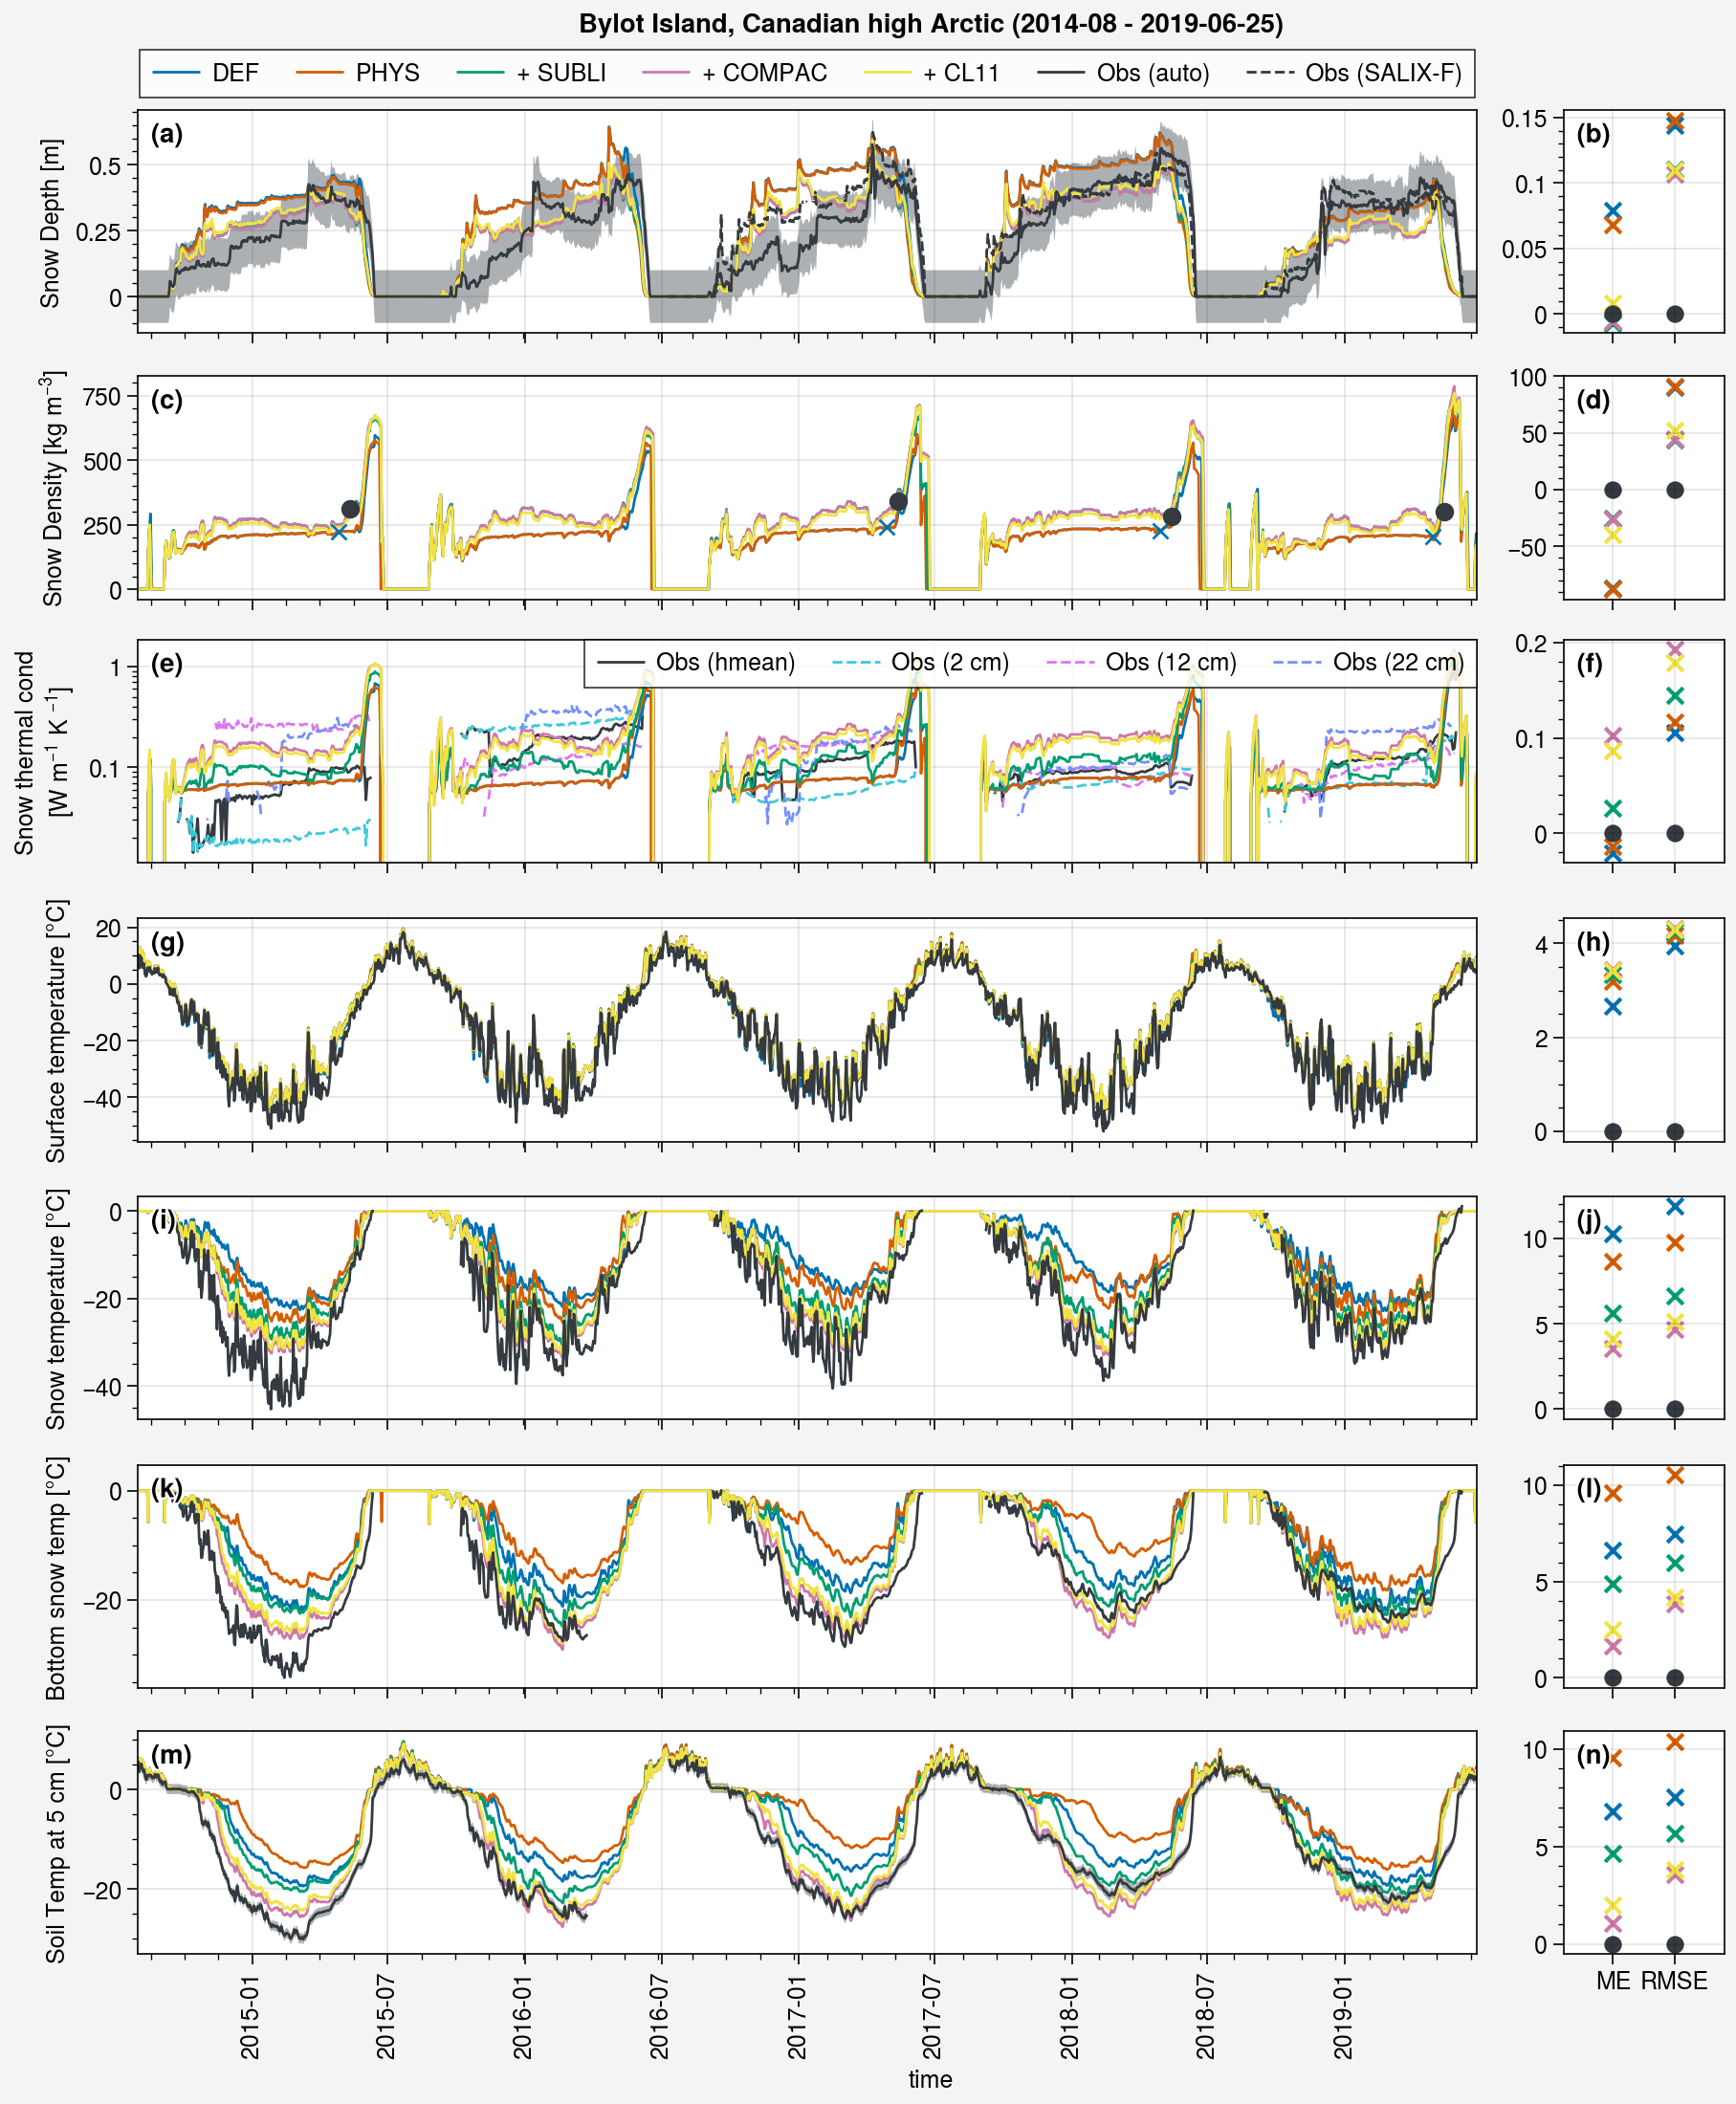

In [111]:
%matplotlib inline
color_obs = 'gray8'
period = slice('2014-08', '2019-06-25')

mask_sd = ds_d_obs.snd_auto.sel(time=period) >= 0.1

# fig, axs = pplt.subplots(nrows=3, ncols=2, refaspect=3.5, sharey=0, figsize=(9,6))
# fig, axs = pplt.subplots(nrows=5, ncols=2, refaspect=3.5, refwidth=6, sharey=0)
fig, axs = pplt.subplots(nrows=7, ncols=2, refaspect=6, refwidth=7, sharey=0, wratios=(1, 0.12))
k = 0
##################
### Snow Depth ###
##################
ax = axs[k]
# Simus
for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    if i < 6:
        ax.plot(ds_d.snd.sel(time=period), label=label_exp, lw=1)
    else:
        ax.plot(ds_d.snd.sel(time=period), label=label_exp, lw=1, ls='--', c='C0')

    df_metrics.loc[('snd_auto', 'RMSE'), label] = (xs.rmse(ds_d.snd.sel(time=period).where(mask_sd), 
                                                        ds_d_obs.snd_auto.sel(time=period).where(mask_sd), skipna=True)).values
    df_metrics.loc[('snd_auto', 'ME'), label] = (xs.me(ds_d.snd.sel(time=period).where(mask_sd), 
                                                      ds_d_obs.snd_auto.sel(time=period).where(mask_sd), skipna=True)).values


# Obs
shadedata = np.concatenate((
    np.expand_dims(ds_d_obs.snd_auto.sel(time=period).values+0.1, axis=0),
    np.expand_dims(ds_d_obs.snd_auto.sel(time=period).values-0.1, axis=0),), axis=0)
ax.plot(ds_d_obs.snd_auto.sel(time=period), shadedata=shadedata, color=color_obs, label='Obs (auto)', lw=1)
ax.plot(ds_SALIX['SALIX-F'].sel(time=period), color=color_obs, ls='--', lw=1, label='Obs (SALIX-F)')
ax.format(ylabel='Snow Depth [m]')

k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('snd_auto'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('snd_auto', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('snd_auto', 'peat_TCZE_REF_TSNB_REF')], color='C0')
ax.format(xlim=(-0.8, 1.8))

 

k += 1
##################
### Snow dens ###
##################
ax = axs[k]

# Simus
for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    if i < 6:
        ax.plot(ds_d.snwdens.sel(time=period), label=label_exp, lw=1)
    else:
        ax.plot(ds_d.snwdens.sel(time=period), label=label_exp, lw=1, ls='--', c='C0')
    # Get the snow density 15 days before the measurement ones because early snowmelt in the model leading to 
    # too high densities... (arbitrary, but more representative in my opinion)
    df_metrics.loc[('snwdens', 'RMSE'), label] = (xs.rmse(ds_d.snwdens.sel(time=period).where(mask_sd).shift(time=30).rolling(time=30).mean(), 
                                                        ds_d_obs.snwdens.sel(time=period).where(mask_sd), skipna=True)).values
    df_metrics.loc[('snwdens', 'ME'), label] = (xs.me(ds_d.snwdens.sel(time=period).where(mask_sd).shift(time=30).rolling(time=30).mean(), 
                                                      ds_d_obs.snwdens.sel(time=period).where(mask_sd), skipna=True)).values
    
# Obs
ax.plot(ds_d_list[0].snwdens.sel(time=period).shift(time=15).where(ds_d_obs.snwdens.sel(time=period) > 0).shift(time=-15), 
        color='C0', marker='x')
ax.plot(ds_d_obs.snwdens.sel(time=period), color=color_obs, marker='o')
ax.format(ylabel='Snow Density [kg m$^{-3}$]')

k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('snwdens'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('snwdens', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('snwdens', 'peat_TCZE_REF_TSNB_REF')], color='C0')


k += 1
##################
### Thermal cond in snow ###
##################
ax = axs[k]

color_dh = 'cyan4'
color_ws = 'indigo4'
color_mid = 'grape4'

# Obs
ax.plot(tcs_hmean.sel(time=period), label='Obs (hmean)', color=color_obs, lw=1)
ax.plot(ds_obs_tc.tcs.sel(time=period, sheight=0.02), label='Obs (2 cm)', lw=1, ls='--', c=color_dh)
ax.plot(ds_obs_tc.tcs.sel(time=period, sheight=0.12), label='Obs (12 cm)', lw=1, ls='--', c=color_mid)
ax.plot(ds_obs_tc.tcs.sel(time=period, sheight=0.22), label='Obs (22 cm)', lw=1, ls='--', c=color_ws)
ax.format(ylabel='Snow thermal cond\n[W m$^{-1}$ K $^{-1}$]', yscale='log')
ax.legend(ncols=5, loc='ur')

for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    ax.plot(ds_d.tcsnow.sel(time=period), label=label_exp, lw=1)
    df_metrics.loc[('tcsnow', 'RMSE'), label] = (xs.rmse(ds_d.tcsnow.sel(time=tcs_hmean.sel(time=period).time).where(mask_sd), 
                                                        tcs_hmean.sel(time=period).where(mask_sd), skipna=True)).values
    df_metrics.loc[('tcsnow', 'ME'), label] = (xs.me(ds_d.tcsnow.sel(time=tcs_hmean.sel(time=period).time).where(mask_sd), 
                                                      tcs_hmean.sel(time=period).where(mask_sd), skipna=True)).values
    
k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('tcsnow'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('tcsnow', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('snwdens', 'peat_TCZE_REF_TSNB_REF')], color='C0')


k += 1
##################
### T surf ###
##################
ax = axs[k]

# Simus
for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    if i < 6:
        ax.plot(ds_d.ts.sel(time=period)-273.15, label=label_exp, lw=1)
    else:
        ax.plot(ds_d.ts.sel(time=period)-273.15, label=label_exp, lw=1, ls='--', c='C0')
    df_metrics.loc[('ts', 'RMSE'), label] = (xs.rmse(ds_d.ts.sel(time=period).where(mask_sd)-273.15, 
                                                        ds_d_obs.ts.sel(time=period).where(mask_sd), skipna=True)).values
    df_metrics.loc[('ts', 'ME'), label] = (xs.me(ds_d.ts.sel(time=period).where(mask_sd)-273.15, 
                                                      ds_d_obs.ts.sel(time=period).where(mask_sd), skipna=True)).values
    
# Obs
ax.plot(ds_d_obs.ts.sel(time=period), color=color_obs, lw=1)
ax.format(ylabel='Surface temperature [°C]')

k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('ts'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('ts', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('ts', 'peat_TCZE_REF_TSNB_REF')], color='C0')


k += 1
##################
### T snow ###
##################
ax = axs[k]

# Simus
for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    if i < 6:
        ax.plot(ds_d.tsn.sel(time=period), label=label_exp, lw=1)
    else:
        ax.plot(ds_d.tsn.sel(time=period), label=label_exp, lw=1, ls='--', c='C0')
    df_metrics.loc[('tsn', 'RMSE'), label] = (xs.rmse(ds_d.tsn.sel(time=period).where(mask_sd), 
                                                        ds_d_obs.tsn.sel(time=period).where(mask_sd), skipna=True)).values
    df_metrics.loc[('tsn', 'ME'), label] = (xs.me(ds_d.tsn.sel(time=period).where(mask_sd), 
                                                      ds_d_obs.tsn.sel(time=period).where(mask_sd), skipna=True)).values
    
# Obs
ax.plot(ds_d_obs.tsn.sel(time=period), color=color_obs, lw=1)
ax.format(ylabel='Snow temperature [°C]')

k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('tsn'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('tsn', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('tsn', 'peat_TCZE_REF_TSNB_REF')], color='C0')


k += 1
##################
### TSNBOT ###
##################
ax = axs[k]

# Simus
for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    if i < 6:
        ax.plot(ds_d.tsnbot.sel(time=period), label=label_exp, lw=1)
    else:
        ax.plot(ds_d.tsnbot.sel(time=period), label=label_exp, lw=1, ls='--', c='C0')
    df_metrics.loc[('tsnbot', 'RMSE'), label] = (xs.rmse(ds_d.tsnbot.sel(time=period).where(mask_sd), 
                                                        TSNBOT_obs_day.sel(time=period).where(mask_sd), skipna=True)).values
    df_metrics.loc[('tsnbot', 'ME'), label] = (xs.me(ds_d.tsnbot.sel(time=period).where(mask_sd), 
                                                      TSNBOT_obs_day.sel(time=period).where(mask_sd), skipna=True)).values
    
# Obs
ax.plot(TSNBOT_obs_day.sel(time=period), color=color_obs, lw=1) 
ax.format(ylabel='Bottom snow temp [°C]')

k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('tsnbot'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('tsnbot', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('tsnbot', 'peat_TCZE_REF_TSNB_REF')], color='C0')


k += 1
##################
### T soil ###
##################
ax = axs[k]

# Simus
for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
    if i < 6:
        ax.plot(ds_d.tsl.sel(time=period, layer=0.05)-273.15, label=label_exp, lw=1)
    else:
        ax.plot(ds_d.tsl.sel(time=period, layer=0.05)-273.15, label=label_exp, lw=1, ls='--', c='C0')
    df_metrics.loc[('tsl_5', 'RMSE'), label] = (xs.rmse(ds_d.tsl.sel(time=period, layer=0.05).where(mask_sd)-273.15, 
                                                        ds_d_obs.tsl.sel(time=period, sdepth=0.05).where(mask_sd), skipna=True)).values
    df_metrics.loc[('tsl_5', 'ME'), label] = (xs.me(ds_d.tsl.sel(time=period, layer=0.05).where(mask_sd)-273.15, 
                                                      ds_d_obs.tsl.sel(time=period, sdepth=0.05).where(mask_sd), skipna=True)).values
    
# Obs
shadedata = np.concatenate((
    np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.05)+1, axis=0),
    np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.05)-1, axis=0),), axis=0)
ax.plot(ds_d_obs.tsl.sel(time=period, sdepth=0.05), shadedata=shadedata, color=color_obs, label='Obs (5 cm)', lw=1)
ax.format(ylabel='Soil Temp at 5 cm [°C]')

k += 1
ax = axs[k]
ax.scatter(df_metrics.loc[('tsl_5'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
ax.scatter(df_metrics.loc[('tsl_5', 'Obs')], color=color_obs)
# ax.scatter(df_metrics.loc[('tsl_5', 'peat_TCZE_REF_TSNB_REF')], color='C0')



# k += 1
# ax = axs[k]
# # Simus
# for i, (ds_d, label, label_exp) in enumerate(zip(ds_d_list, labels, label_exps)):
#     if i < 6:
#         ax.plot(ds_d.tsl.sel(time=period).sel(layer=0.15, method='nearest')-273.15, label=label_exp, lw=1)
#     else:
#         ax.plot(ds_d.tsl.sel(time=period).sel(layer=0.15, method='nearest')-273.15, label=label_exp, lw=1, ls='--', c='C0')
#     df_metrics.loc[('tsl_15', 'RMSE'), label] = (xs.rmse(ds_d.tsl.sel(time=period).sel(layer=0.15, method='nearest').where(mask_sd)-273.15, 
#                                                         ds_d_obs.tsl.sel(time=period, sdepth=0.15).where(mask_sd), skipna=True)).values
#     df_metrics.loc[('tsl_15', 'ME'), label] = (xs.me(ds_d.tsl.sel(time=period).sel(layer=0.15, method='nearest').where(mask_sd)-273.15, 
#                                                       ds_d_obs.tsl.sel(time=period, sdepth=0.15).where(mask_sd), skipna=True)).values
    
# # Obs
# shadedata = np.concatenate((
#     np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.15)+1, axis=0),
#     np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.15)-1, axis=0),), axis=0)
# ax.plot(ds_d_obs.tsl.sel(time=period, sdepth=0.15), shadedata=shadedata, color=color_obs, label='Obs (15 cm)', lw=1)
# ax.format(ylabel='Soil Temp at 15 cm [°C]')

# k += 1
# ax = axs[k]
# ax.scatter(df_metrics.loc[('tsl_15'), df_metrics.columns.get_level_values(0)[1:]], marker='x')
# ax.scatter(df_metrics.loc[('tsl_15', 'Obs')], color=color_obs)
# # ax.scatter(df_metrics.loc[('tsl_15', 'peat_TCZE_REF_TSNB_REF')], color='C0')




# # Simus
# for ds_d, label, label_exp in zip(ds_d_list, labels, label_exps):
#     ax.plot(ds_d.tsl.sel(time=period, layer=0.05)-273.15, label=label_exp+' (layer 1)')
    
# # Obs
# shadedata = np.concatenate((
#     np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.05)+1, axis=0),
#     np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.05)-1, axis=0),), axis=0)
# ax.plot(ds_d_obs.tsl.sel(time=period, sdepth=0.05), shadedata=shadedata, color=color_obs, label='Obs (5 cm)')
# # ax.plot(ds_d_obs.tsl.sel(time=period, sdepth=[0.02, 0.05, 0.1]).integrate('sdepth')/(0.1-0.02), color='red')

# ax.hlines(0, ds_d.tsl.sel(time=period).time[0], ds_d.tsl.sel(time=period).time[-1], c=color_obs, lw=1, alpha=0.5)
# ax.format(ylabel='Soil Temp at 5 cm [°C]')
# ax.legend()

# k += 1
# ax = axs[k]
# # Simus
# for ds_d, label, label_exp in zip(ds_d_list, labels, label_exps):
#     ax.plot(ds_d.tsl.sel(time=period).sel(layer=0.15, method='nearest')-273.15, label=label_exp+' (layer 2)')

# # Obs
# shadedata = np.concatenate((
#     np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.15)+1, axis=0),
#     np.expand_dims(ds_d_obs.tsl.sel(time=period, sdepth=0.15)-1, axis=0),), axis=0)
# ax.plot(ds_d_obs.tsl.sel(time=period, sdepth=0.15), shadedata=shadedata, color=color_obs, label='Obs (15 cm)')
# # ax.plot(ds_d_obs.tsl.sel(time=period, sdepth=[0.1, 0.15, 0.21]).integrate('sdepth')/(0.21-0.1), color='red')


# ax.hlines(0, ds_d.tsl.sel(time=period).time[0], ds_d.tsl.sel(time=period).time[-1], c=color_obs, lw=1, alpha=0.5)
# ax.format(ylabel='Soil Temp at 15 cm [°C]')
# ax.legend()



fig.suptitle(site_longname + ' ('+period.start+' - '+period.stop+')')
fig.format(abc='(a)', abcloc='ul')
axs[0].legend(ncols=7, loc='t')


# fig.save('img/'+site+'_peat_paper_all_2014-2019.png')
# fig.save('img/'+site+'_peat_paper_all_2014-2019.jpg')
# fig.save('img/'+site+'_peat_paper_all_2014-2019.pdf')

In [84]:
df_metrics

Obs               peat_DEF peat_BUG_CORRECT_TSNBT_OP1_EZERO  \
snd_auto ME     0    0.07878470030479807              0.06824919419122641   
         RMSE   0    0.14400356434375736               0.1481324360357674   
snwdens  ME     0     -87.18789721681574                -87.7158146248438   
         RMSE   0      90.62265192446904                91.13705348945312   
tcsnow   ME     0  -0.020255729597586487            -0.013930655051015362   
         RMSE   0    0.10567193564906009              0.11676994915150246   
ts       ME     0      2.668829284165152               3.1953895661158924   
         RMSE   0     3.9488429727073404                4.177783866263342   
tsn      ME     0     10.288607334692397                 8.66043067763853   
         RMSE   0      11.87284215640673                9.777949584580503   
tsnbot   ME     0      6.629404655480835                9.614878066236088   
         RMSE   0      7.480344770269413                10.53059921218079   
tsl_5    ME     0      6.805080884328851                9.551789380813872   
         RMSE   0      7.528592984684585               10.379589807933513   
tsl_15   ME     0      7.749538890716369               10.309955696182074   
         RMSE   0      8.436676689245576               11.129629412260428   

              peat_PHYS_ALL_SUBLI_v2_COMPAC_v1  \
snd_auto ME              -0.006816003504318332   
         RMSE              0.11073468646432474   
snwdens  ME                 -25.61786422651506   
         RMSE                44.13958310593827   
tcsnow   ME               0.026310415139655357   
         RMSE               0.1441614843251739   
ts       ME                 3.3370760847250125   
         RMSE                4.244936128942227   
tsn      ME                  5.645265140927506   
         RMSE               6.6374178145020695   
tsnbot   ME                  4.877657680626665   
         RMSE                5.956475066717855   
tsl_5    ME                  4.661127276411118   
         RMSE                5.662205238905394   
tsl_15   ME                  5.407423642145531   
         RMSE                6.297161553751423   

              peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne  \
snd_auto ME                      -0.005585213408956845   
         RMSE                      0.10716087745724014   
snwdens  ME                         -25.91487912240794   
         RMSE                        44.45188775994819   
tcsnow   ME                        0.10302046880046128   
         RMSE                      0.19231013097072527   
ts       ME                         3.4344183302034503   
         RMSE                        4.316441773087676   
tsn      ME                         3.5744087189183724   
         RMSE                        4.657657290584046   
tsnbot   ME                         1.6561038510758808   
         RMSE                        3.821561853896359   
tsl_5    ME                          1.093514089382742   
         RMSE                       3.5427194747084596   
tsl_15   ME                          1.708598163548153   
         RMSE                       3.6691187569433734   

              peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne  
snd_auto ME                                0.008168160798164768  
         RMSE                               0.10993891018308008  
snwdens  ME                                 -39.662307215047605  
         RMSE                                 52.24591613397585  
tcsnow   ME                                 0.08642107882440694  
         RMSE                               0.17890982304363123  
ts       ME                                  3.4145068864782813  
         RMSE                                 4.299770723372287  
tsn      ME                                   4.108400033192623  
         RMSE                                 5.147143685357198  
tsnbot   ME                                  2.5038733078527966  
         RMSE                                 4.202779596871033  
tsl_5   

In [85]:
tot_year = y_end - y_start + 1
gap = 4
years = pplt.arange(y_start, y_end)
years

array([2013, 2014, 2015, 2016, 2017, 2018, 2019])

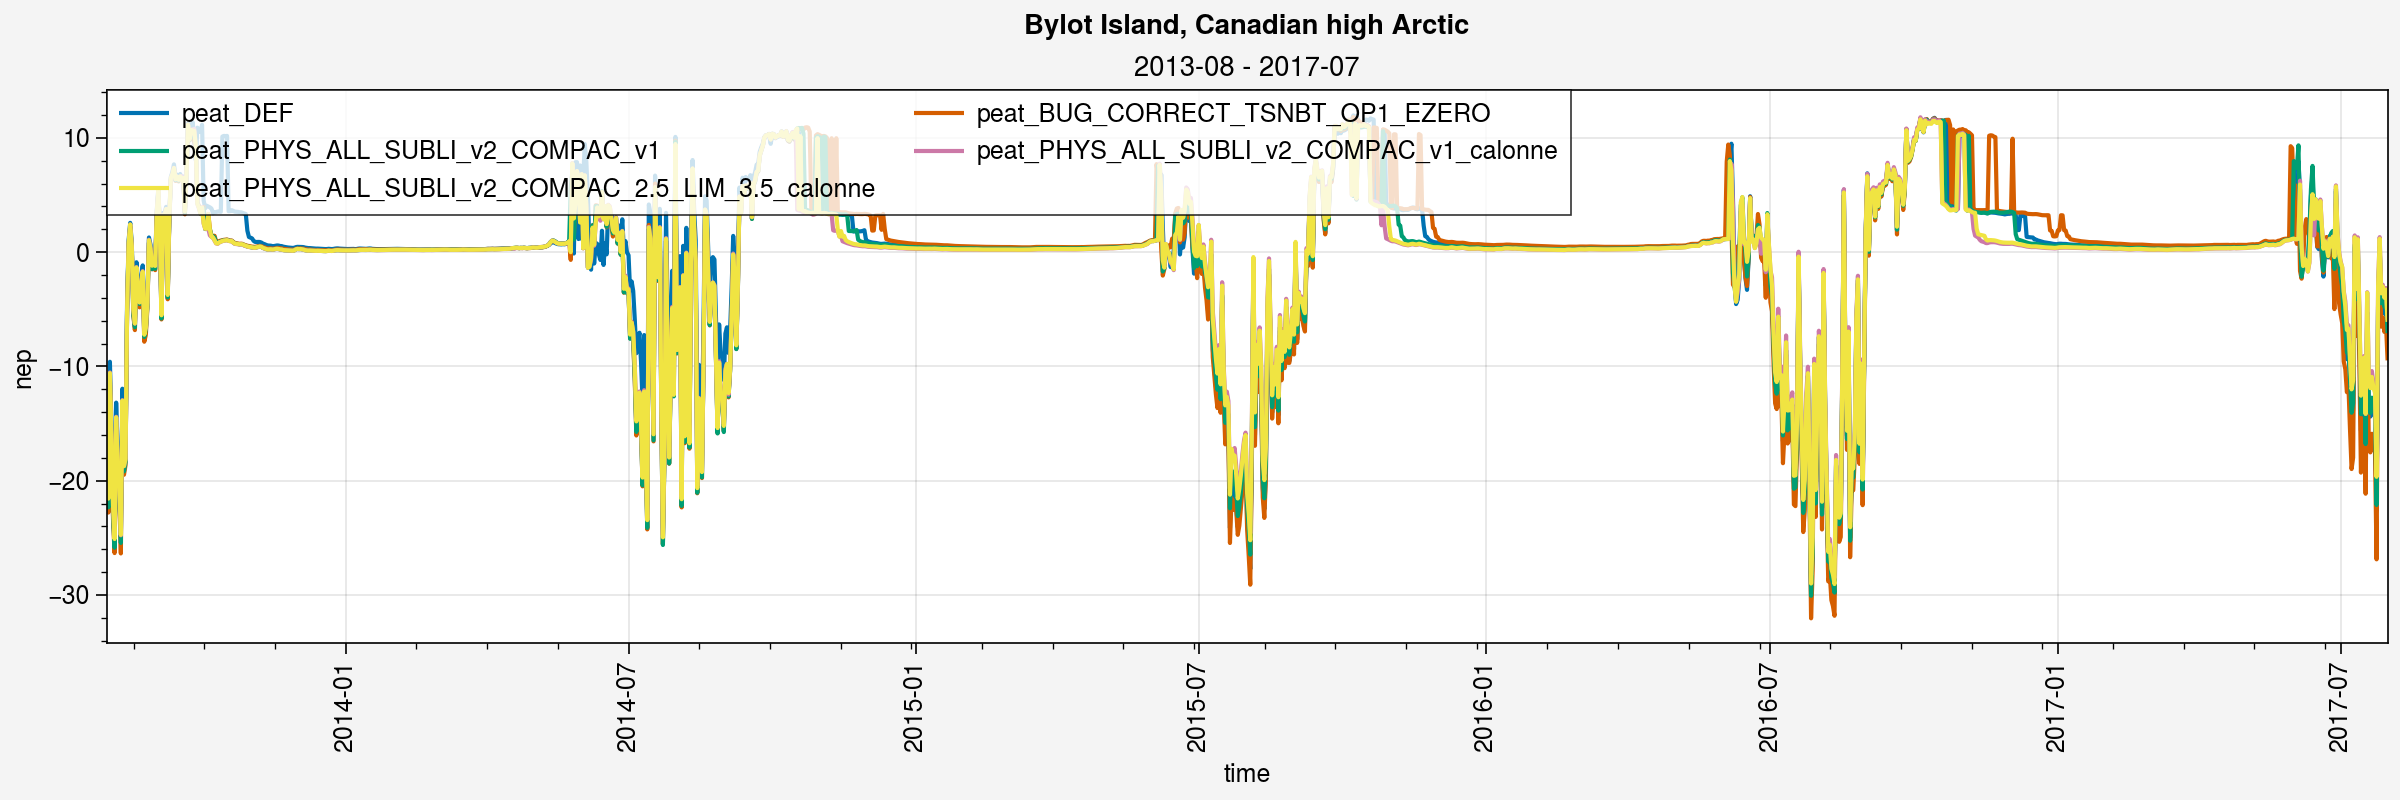

In [87]:
%matplotlib inline

color_obs = 'gray8'

for i in range(tot_year//gap):
    fig, axs = pplt.subplots(ncols=1, nrows=1, figsize=(12,4))

    if i*gap+gap < tot_year:
        period=slice(str(years[i*gap])+'-08',str(years[i*gap+gap])+'-07')
    else:
        period=slice(str(years[i*gap])+'-08',str(years[-1])+'-07')
    
    # Simus
    for ds_d, label, label_exp in zip(ds_d_list, labels, label_exps):
        axs[0].plot(-ds_d.nep.sel(time=period)*1e9, label=label_exp)
    
    # Obs
    # axs[0].plot(ds_d_turb.nee.sel(time=period)*1e8, color=color_obs)
    
    axs[0].legend(loc='ul', ncols=2)
    axs[0].format(title=period.start+' - '+period.stop)
    
    fig.suptitle(site_longname)
    # fig.save('bylot_snd.pdf')

Text(0.5, 0.98, 'Bylot Island, Canadian high Arctic')

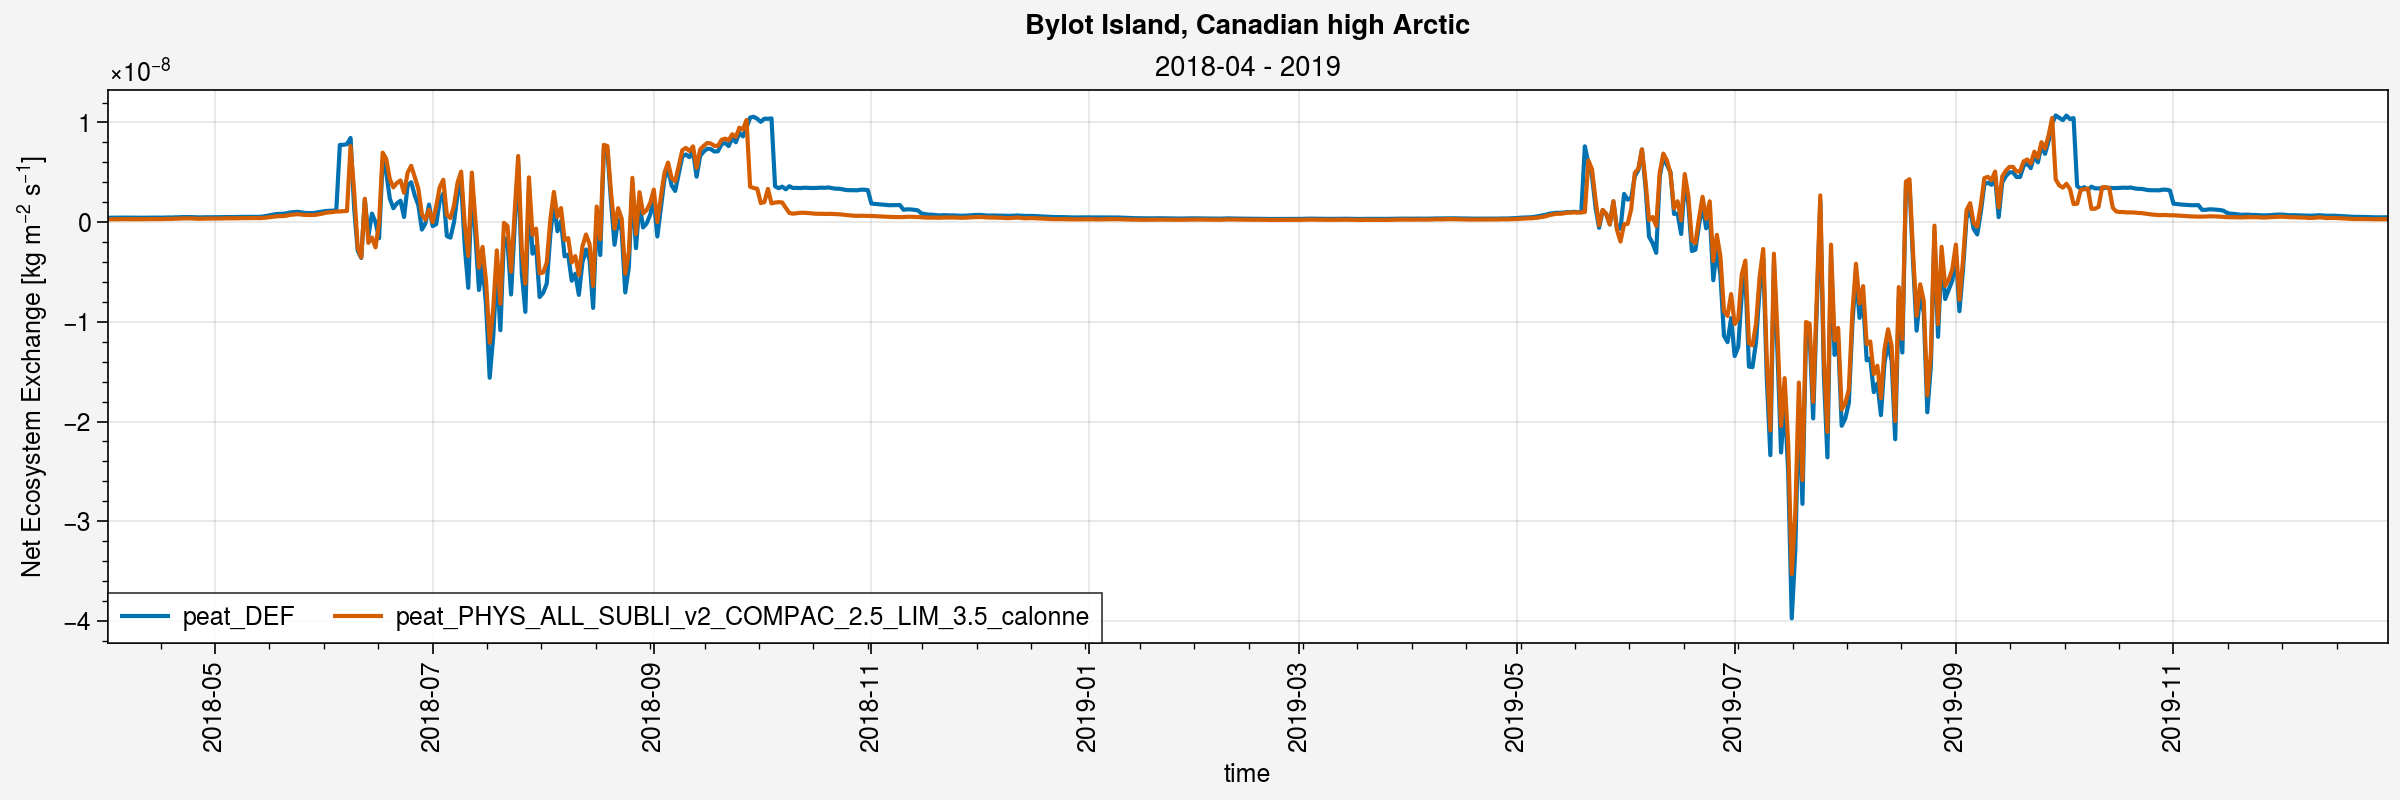

In [88]:
%matplotlib inline

color_obs = 'gray8'

fig, axs = pplt.subplots(ncols=1, nrows=1, figsize=(12,4))

period=slice('2018-04','2019')

# Simus
# for ds_d, label, label_exp in zip(ds_d_list, labels, label_exps):
#     axs[0].plot(-ds_d.nep.sel(time=period)/(44.01e-9)*10, label=label_exp)

axs[0].plot(-ds_d_list[0].nep.sel(time=period), label=label_exps[0])
axs[0].plot(-ds_d_list[-1].nep.sel(time=period), label=label_exps[-1])


# Obs
# axs[0].plot(ds_d_turb.nee.sel(time=period), color=color_obs, lw=0.5)

axs[0].legend(ncols=3)
axs[0].format(
    title = period.start+' - '+period.stop,
    ylabel = 'Net Ecosystem Exchange [kg m$^{-2}$ s$^{-1}$]'
)

fig.suptitle(site_longname)
# fig.save('bylot_snd.pdf')

Text(0.5, 0.98, 'Bylot Island, Canadian high Arctic')

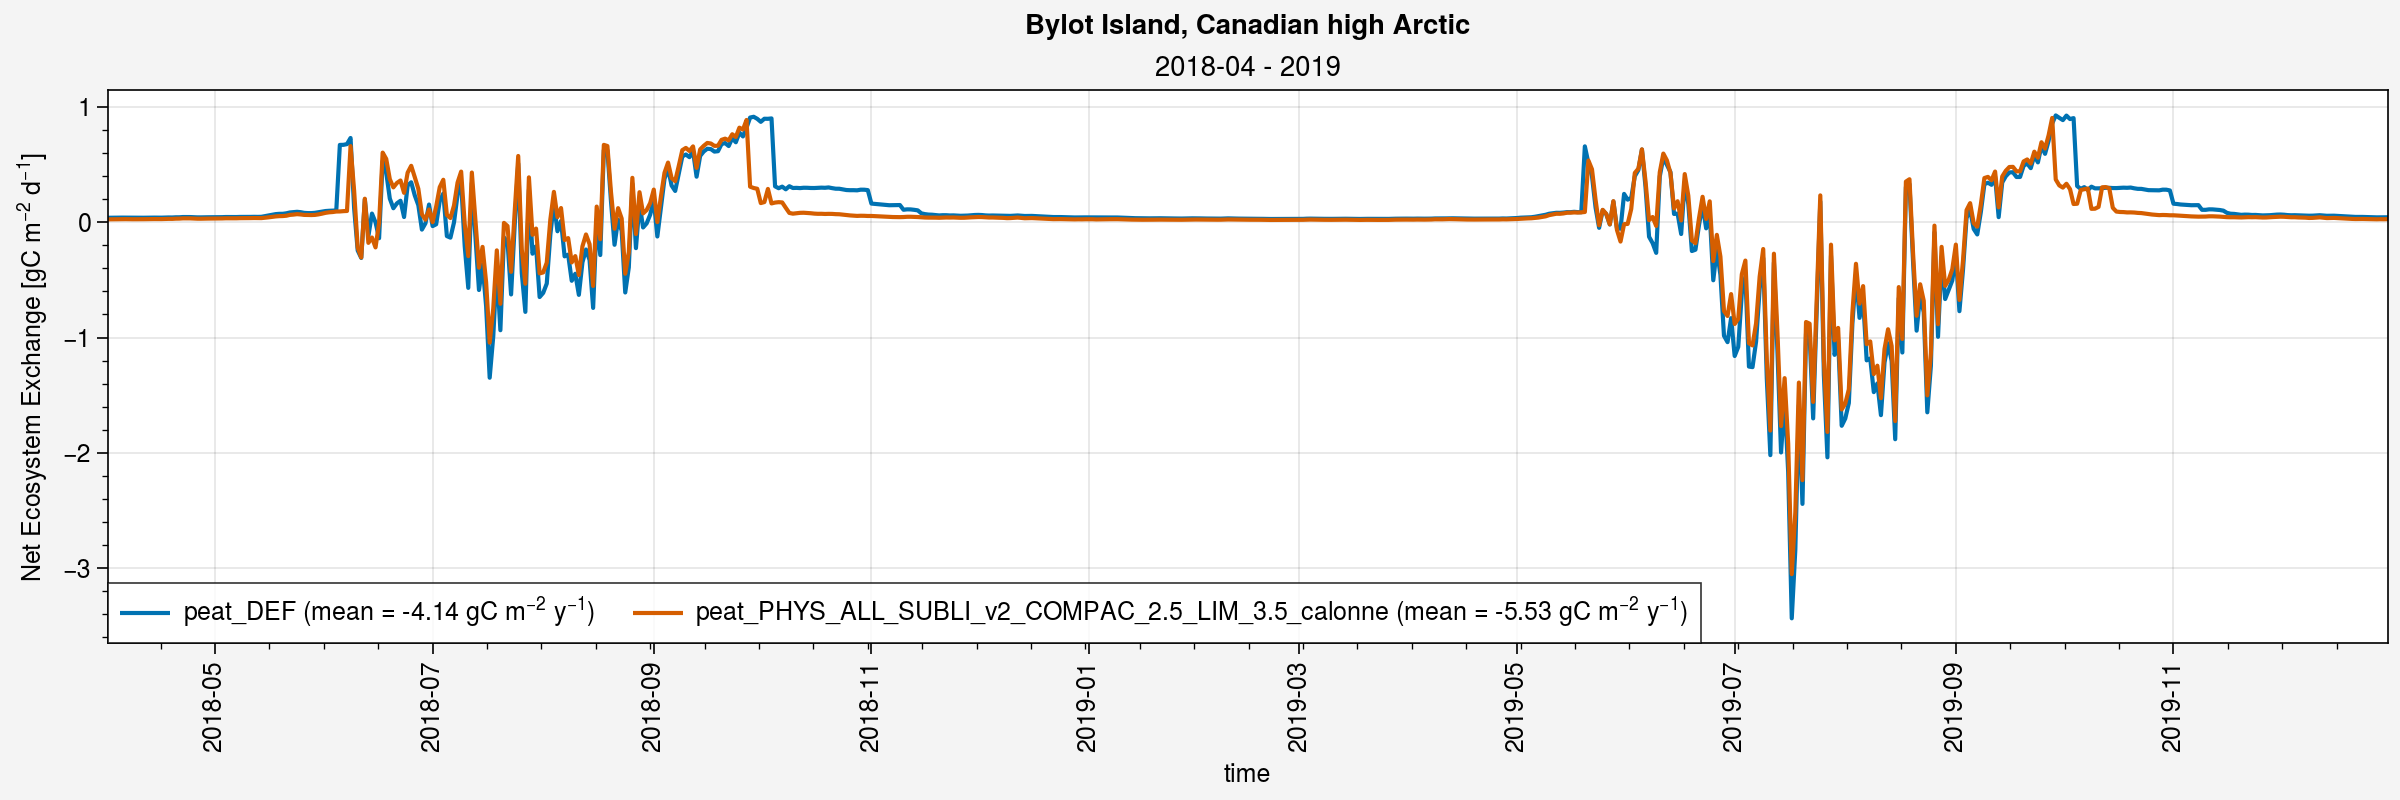

In [89]:
%matplotlib inline

color_obs = 'gray8'

fig, axs = pplt.subplots(ncols=1, nrows=1, figsize=(12,4))

period=slice('2018-04','2019')

# Simus
# for ds_d, label, label_exp in zip(ds_d_list, labels, label_exps):
#     axs[0].plot(-ds_d.nep.sel(time=period)/(44.01e-9)*10, label=label_exp)

axs[0].plot(-ds_d_list[0].nep.sel(time=period)*86400000, label=label_exps[0] + ' (mean = ' + str(np.round(-ds_d_list[0].nep.sel(time=period).mean().values*86400000*365, 2)) + ' gC m$^{-2}$ y$^{-1}$)')
axs[0].plot(-ds_d_list[-1].nep.sel(time=period)*86400000, label=label_exps[-1] + ' (mean = ' + str(np.round(-ds_d_list[-1].nep.sel(time=period).mean().values*86400000*365, 2)) + ' gC m$^{-2}$ y$^{-1}$)')


# Obs
# axs[0].plot(ds_d_turb.nee.sel(time=period), color=color_obs, lw=0.5)

axs[0].legend(ncols=3)
axs[0].format(
    title = period.start+' - '+period.stop,
    ylabel = 'Net Ecosystem Exchange [gC m$^{-2}$ d$^{-1}$]'
)

fig.suptitle(site_longname)
# fig.save('bylot_carbon_fluxes_2018_2019.jpg')

In [78]:
np.round(-ds_d_list[0].nep.sel(time=period).mean().values, 12)

-1.31e-10

In [79]:
ds_d_list[0].nep

<xarray.DataArray 'nep' (time: 2556)> Size: 20kB
array([-4.81318725e-10, -4.61753297e-10, -4.55159501e-10, ...,
       -4.85308397e-10, -4.78820705e-10, -4.88986444e-10])
Coordinates:
  * time     (time) datetime64[ns] 20kB 2013-01-01 2013-01-02 ... 2019-12-31
Attributes:
    long_name:   Natural flux of CO2 (expressed as a mass flux of carbon) fro...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  nep_d_g